In [5]:
from keras.applications import VGG16
from keras import models
from keras import layers

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [7]:
import os 
import numpy as np
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

base_dir = r'D:/train/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)


#datagen = ImageDataGenerator(rescale=1./255)
#batch_size = 20

'''
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size, class_mode='binary')

    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        print(i, end=' ')
        if i * batch_size >= sample_count:
            break

    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)
'''

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 44s 445ms/step - loss: 0.5979 - acc: 0.6725 - val_loss: 0.4645 - val_acc: 0.8200
Epoch 2/30
100/100 [==============================] - 17s 166ms/step - loss: 0.4931 - acc: 0.7765 - val_loss: 0.3782 - val_acc: 0.8500
Epoch 3/30
100/100 [==============================] - 17s 168ms/step - loss: 0.4424 - acc: 0.8045 - val_loss: 0.3365 - val_acc: 0.8620
Epoch 4/30
100/100 [==============================] - 17s 168ms/step - loss: 0.4096 - acc: 0.8205 - val_loss: 0.3154 - val_acc: 0.8790
Epoch 5/30
100/100 [==============================] - 17s 168ms/step - loss: 0.3829 - acc: 0.8305 - val_loss: 0.2964 - val_acc: 0.8740
Epoch 6/30
100/100 [==============================] - 16s 165ms/step - loss: 0.3675 - acc: 0.8375 - val_loss: 0.2894 - val_acc: 0.8750
Epoch 7/30
100/100 [==========

"\ndef extract_features(directory, sample_count):\n    features = np.zeros(shape=(sample_count, 4, 4, 512))\n    labels = np.zeros(shape=(sample_count))\n    generator = datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size, class_mode='binary')\n\n    i = 0\n    for inputs_batch, labels_batch in generator:\n        features_batch = conv_base.predict(inputs_batch)\n        features[i * batch_size : (i + 1) * batch_size] = features_batch\n        labels[i * batch_size : (i + 1) * batch_size] = labels_batch\n        i += 1\n        print(i, end=' ')\n        if i * batch_size >= sample_count:\n            break\n\n    return features, labels\n\ntrain_features, train_labels = extract_features(train_dir, 2000)\nvalidation_features, validation_labels = extract_features(validation_dir, 1000)\ntest_features, test_labels = extract_features(test_dir, 1000)\n"

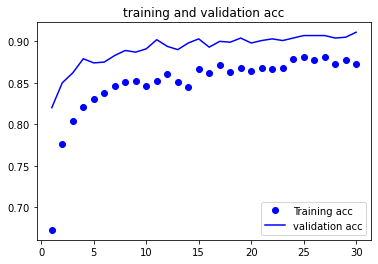

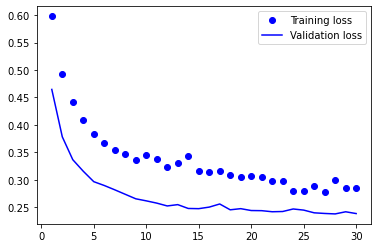

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

plt.show()